# Brain Cancer Classifier 

#### Data Modeling - Machine Leaning 

----

### Loading Dataset

We are gonna to use a specific dataset from HuggingFace : "Alwaly/Brain_Cancer-cancer" and the preprocessed one that we save from 01_data_prep.ipynb


In [1]:
# Loading the preprocessed dataset
from datasets import DatasetDict
from collections import Counter

ds = DatasetDict.load_from_disk("/Users/adwunder/Data Science Projects/Cancer_Brain/data/brain_cancer_dataset")

In [2]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 12000
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 1500
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1500
    })
})

-----

## Creation of ML Model 

##### (Based on a CNN)

CNN stands for Convolutional Neural Network which is a specialized neural network for processing data that has an input shape like a 2D matrix like images. CNN's are typically used for image detection and classification.

In [3]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
   

### Adapting image into tensors for modeling into the CNN

In [ ]:
# Converting images to tensors and normalizing to be compatible with CNN

IMG = 244
BATCH = 32
AUTOTUNE = tf.data.AUTOTUNE

# Preprocessing function
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG, IMG))
    image = tf.cast(image, tf.float32) / 255.0  # Normalizing the image
    return image, label

# Train dataset

train_tf = (
    ds["train"]
      .to_tf_dataset(columns=["image"], label_cols=["label"],
                     batch_size=BATCH, shuffle=True) 
      .map(preprocess_image, num_parallel_calls=AUTOTUNE) 
      .prefetch(AUTOTUNE) 
)

/Users/adwunder/Data Science Projects/Cancer_Brain/.venv/lib/python3.11/site-packages/datasets/arrow_dataset.py:403: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [8]:
# Creation of the CNN model

modelCNN = models.Sequential([
    layers.Input(shape=(IMG, IMG, 3)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dense(3, activation='softmax') 
])

In [9]:
# Summary of the model
modelCNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 244, 244, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 122, 122, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,635 (365.76 KB)

 Trainable params: 93,635 (365.76 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compliling the model

modelCNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy', # Using sparse categorical crossentropy for integer labels 
                    metrics=['accuracy'])

print("Model compiled successfully.")


Model compiled successfully.


If we use sparse_categorical_crossentropy, the labels should be integers (0, 1, 2) instead of one-hot encoded vectors.

In [12]:
# Training the model

history = modelCNN.fit(train_tf, epochs=10)


Epoch 1/10


2025-08-23 15:08:03.736782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


375/375 ━━━━━━━━━━━━━━━━━━━━ 92s 229ms/step - accuracy: 0.6223 - loss: 0.7770
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 88s 234ms/step - accuracy: 0.7111 - loss: 0.6621
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 67s 178ms/step - accuracy: 0.7468 - loss: 0.5936
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 145ms/step - accuracy: 0.7630 - loss: 0.5516
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 145ms/step - accuracy: 0.7949 - loss: 0.5032
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 154ms/step - accuracy: 0.8018 - loss: 0.4802
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 61s 163ms/step - accuracy: 0.8189 - loss: 0.4564
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 168ms/step - accuracy: 0.8282 - loss: 0.4358
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 60s 161ms/step - accuracy: 0.8376 - loss: 0.4176
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 61s 162ms/step - accuracy: 0.8479 - loss: 0.3961


In [15]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

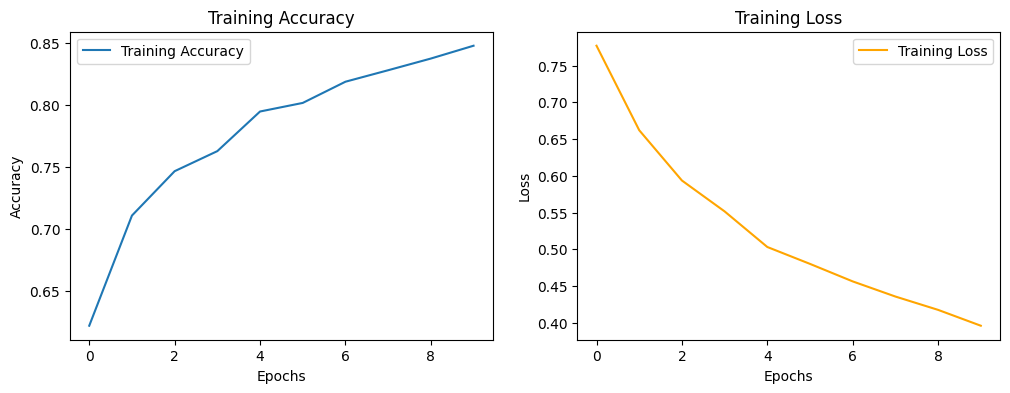

In [16]:
# Plotting training accuracy and loss

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# -----------------------------------
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Validation of the model

In [ ]:
# Converting validation data to tf dataset
val_tf = (
    ds["validation"]
      .to_tf_dataset(columns=["image"], label_cols=["label"],
                     batch_size=BATCH, shuffle=False) 
      .map(preprocess_image, num_parallel_calls=AUTOTUNE) 
      .prefetch(AUTOTUNE) 
)

# Validation of the model
val_loss, val_acc = modelCNN.evaluate(val_tf, verbose=0)
print(f"Validation — acc: {val_acc:.3f} | loss: {val_loss:.3f}")


/Users/adwunder/Data Science Projects/Cancer_Brain/.venv/lib/python3.11/site-packages/datasets/arrow_dataset.py:403: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


Validation — acc: 0.849 | loss: 0.401


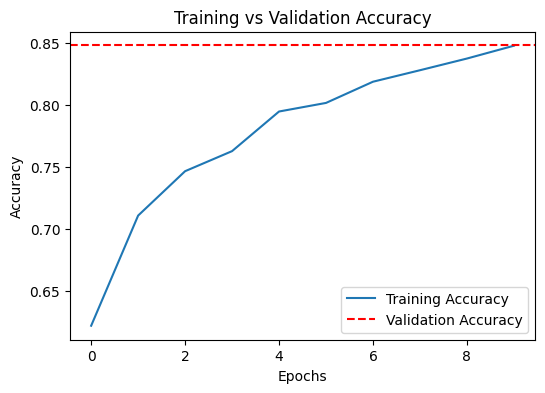

In [19]:
# Comparison of training and validation accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.axhline(y=val_acc, color='r', linestyle='--', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

No overfitting due to a epochs of ten (simplify the model here) because improvements can be done (regularization L2, training more, ...)

Test Validation 

In [20]:
# Converting test data to tf dataset

test_tf = (
    ds["test"]
      .to_tf_dataset(columns=["image"], label_cols=["label"],
                     batch_size=BATCH, shuffle=False)
      .map(preprocess_image, num_parallel_calls=AUTOTUNE)
      .prefetch(AUTOTUNE)
)       

# Test Validation
test_loss, test_acc = modelCNN.evaluate(test_tf, verbose=0)
print(f"Test — acc: {test_acc:.3f} | loss: {test_loss:.3f}")

/Users/adwunder/Data Science Projects/Cancer_Brain/.venv/lib/python3.11/site-packages/datasets/arrow_dataset.py:403: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


Test — acc: 0.839 | loss: 0.412


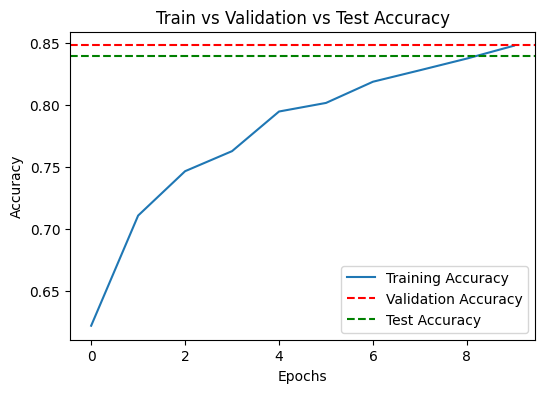

In [22]:
# Comparisons of train/test/validation accuracy

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.axhline(y=val_acc, color='r', linestyle='--', label='Validation Accuracy')
plt.axhline(y=test_acc, color='g', linestyle='--', label='Test Accuracy')
plt.title('Train vs Validation vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

2025-08-23 15:37:11.630536: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step
Classification Report:
              precision    recall  f1-score   support

brain_glioma       0.85      0.87      0.86       500
 brain_menin       0.76      0.84      0.80       500
 brain_tumor       0.93      0.80      0.86       500

    accuracy                           0.84      1500
   macro avg       0.85      0.84      0.84      1500
weighted avg       0.85      0.84      0.84      1500



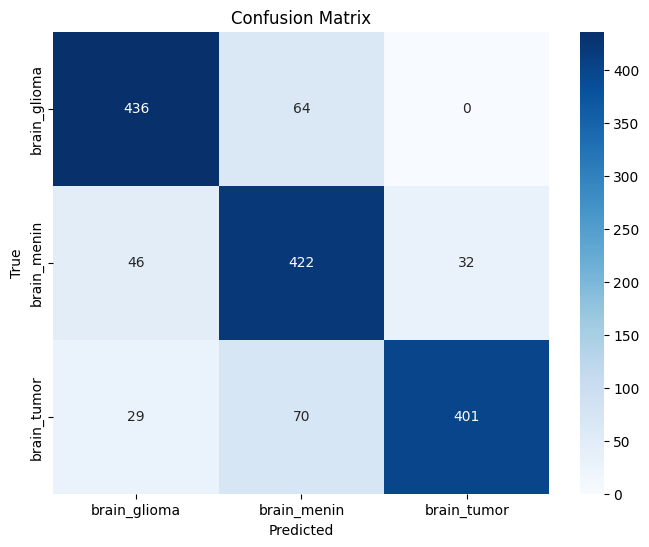

In [ ]:
# Classification report and confusion matrix for test set

y_true = np.concatenate([y for x, y in test_tf], axis=0) # La compréhension de liste [y for x, y in test_tf] parcourt tous les batches du test et récupère chaque y_batch.
y_pred_probs = modelCNN.predict(test_tf)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=ds['train'].features['label'].names))

# Image of the confusion matrix
import seaborn as sns   
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=ds['train'].features['label'].names,
            yticklabels=ds['train'].features['label'].names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()